<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Keras_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KERAS functional API

https://github.com/PacktPublishing/Keras-Deep-Learning-Cookbook

## Image Cassification using KERAS functional api

## Create Model Instance 

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import keras
from keras.datasets import mnist

In [0]:
num_classes = 10
batch_size = 32
epochs = 10
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

##  Define Input Layer 

In [4]:
input_shape =(28,28)
inputs = Input(input_shape)

W0715 08:39:43.805563 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 08:39:43.879807 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [5]:
inputs

<tf.Tensor 'input_1:0' shape=(?, 28, 28) dtype=float32>

## Add another dimension to the input for convolution and reshape the input using Reshape Layer

In [6]:
x = Reshape(input_shape +(1,),input_shape= input_shape)(inputs)
x

<tf.Tensor 'reshape_1/Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

## Define Convolutional Layer 1

In [7]:
conv1 = Conv2D(16,kernel_size=3,activation='relu')(x)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

W0715 09:02:45.064939 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 09:02:45.117720 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



## Define Convolutional Layer 2

In [0]:
conv2 = Conv2D(32,kernel_size=3,activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

## Define Flatten Layer

In [0]:
flatten = Flatten()(pool2)

## Define Output Layer - number of neurons = 10, since training dataset has 10 classes {0 to 9}

In [0]:
output = Dense(10,activation='softmax')(flatten)

##Create Model

In [0]:
model = Model(inputs= inputs,outputs=output)

## Model Summary

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 14)        140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

## Plot Model

In [0]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
plot_model(model, to_file='convolutional_neural_network.png')
plt.show()

## Define optimizers

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

## Train the model using RMSprop

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

W0715 09:50:59.127001 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 09:50:59.144604 139628960102272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## train test split data

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Convert Labels into Categorical Values 

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Train the model using training dataset

In [30]:
hist = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 27s 453us/step - loss: 0.0803 - acc: 0.9805 - val_loss: 0.1074 - val_acc: 0.9753
Epoch 2/12
60000/60000 [==============================] - 27s 457us/step - loss: 0.0723 - acc: 0.9825 - val_loss: 0.1081 - val_acc: 0.9757
Epoch 3/12
60000/60000 [==============================] - 27s 455us/step - loss: 0.0651 - acc: 0.9837 - val_loss: 0.1109 - val_acc: 0.9744
Epoch 4/12
60000/60000 [==============================] - 27s 455us/step - loss: 0.0598 - acc: 0.9848 - val_loss: 0.0977 - val_acc: 0.9769
Epoch 5/12
60000/60000 [==============================] - 28s 460us/step - loss: 0.0543 - acc: 0.9861 - val_loss: 0.0949 - val_acc: 0.9777
Epoch 6/12
60000/60000 [==============================] - 28s 461us/step - loss: 0.0500 - acc: 0.9872 - val_loss: 0.0905 - val_acc: 0.9798
Epoch 7/12
60000/60000 [==============================] - 28s 459us/step - loss: 0.0464 - acc: 0.9884 - val_loss: 0.

## evaluate the model

In [31]:
scores = model.evaluate(X_test,y_test,verbose=1)

10000/10000 [==============================] - 2s 191us/step


In [35]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100.0)

Test loss: 0.08277594069611387
Test accuracy: 98.15


## Visualize Training and Validation Loss

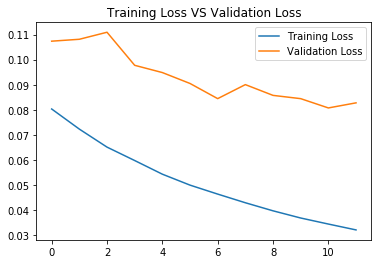

In [33]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss VS Validation Loss')
plt.show()

## Visualizing Training Accuracy and Validation Accuracy

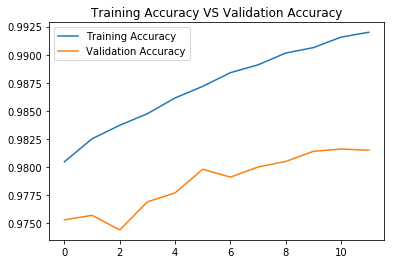

In [34]:
plt.plot(hist.history['acc'],label='Training Accuracy')
plt.plot(hist.history['val_acc'],label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy VS Validation Accuracy')
plt.show()